# Exploratory data analysis

__Agenda__

- Loading dataset 'diamonds'

- Working with seaborn library

- Some data visualization techniques for EDA

__Import Libraries__

In [1]:
## Import pandas
import pandas as pd

## import seaborn
import seaborn as sns
from matplotlib import pyplot as plt

## import numpy
import numpy as np

In [2]:
diamonds = sns.load_dataset("diamonds")

diamonds


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


__More on the diamonds dataset__

[Seaborn - Datasets](https://seaborn.pydata.org/generated/seaborn.load_dataset.html)

[Kaggle for columns](https://www.kaggle.com/shivam2503/diamonds)


Column| Range
 ---- | ------
price price in US dollars |(\$326--\$18,823)
carat weight of the diamond | (0.2--5.01)
cut quality of the cut |(Fair, Good, Very Good, Premium, Ideal)
color diamond colour | from J (worst) to D (best)
clarity a measurement of how clear the diamond is | (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
x length in mm | (0--10.74)
y width in mm | (0--58.9)
z depth in mm | (0--31.8)
depth total depth percentage = $ \frac{z}{mean(x, y)} = \frac{2 \cdot z}{(x + y)}$ | (43--79)
table width of top of diamond relative to widest point | (43--95)

## Visualising distributions

- By checking the distribution of a variable we can answer:

  - Which values are the most common?
  - Which values are rare and why?
  - Is there any unusual patterns? What might be the reasons of such patterns?
  

### Univariate Analysis -- Studying Variation



In [3]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


#### Categorical Variables

In [4]:
## Let's see the number of diamonds for each different type of cuts

cuts = diamonds.cut.value_counts()
cuts

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

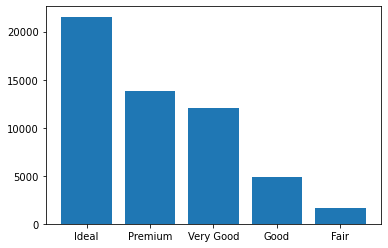

In [5]:
plt.bar(x = cuts.index, height = cuts.values)
plt.show()

__Seaborn Library__

[Seaborn Library](https://seaborn.pydata.org/index.html)

Text(0.5, 1.0, 'Diamonds Data Counts by Cuts')

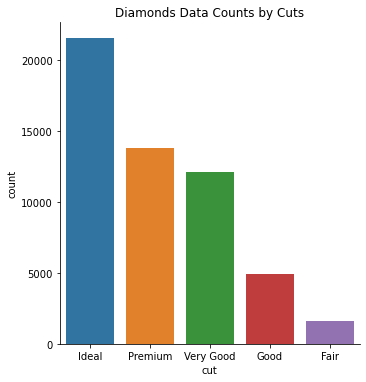

In [8]:
## import seaborn as sns
import seaborn as sns

## we can use catplot for showing the count
plot = sns.catplot(data= diamonds, kind = 'count', x = 'cut')


## Note that since seaborn is built on top of matplotlib
## we can use matplotlib features like adding a title

# plot = sns.catplot(data= diamonds, kind = 'count', x = 'cut', order=[ 'Premium','Ideal'])
plot.ax.set_title('Diamonds Data Counts by Cuts')

## note that we could also set the order of the categories by order= ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']

#### Continuous Variables


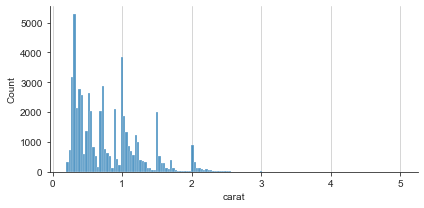

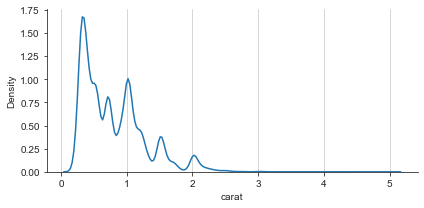

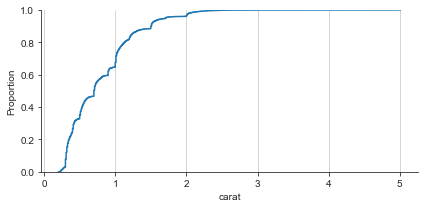

In [17]:
sns.set_style('ticks')

## we can use displot to see the distribution of 'carat' colum.
plot = sns.displot(data = diamonds, x= 'carat', kind = 'hist', height=3 ,aspect=2)
plot.ax.grid(axis = 'x')

## or we can just take a look at the densities
plot = sns.displot(data = diamonds, x= 'carat', kind = 'kde', height= 3, aspect = 2)

## note that we can add a grid also
plot.ax.grid(axis = 'x')

plot = sns.displot(data = diamonds, x= 'carat', kind = 'ecdf', height= 3, aspect = 2)
plot.ax.grid(axis = 'x')


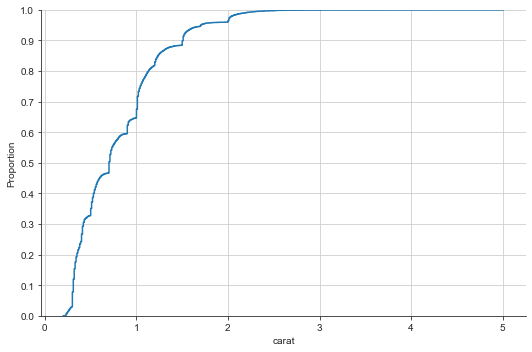

In [18]:
# https://en.wikipedia.org/wiki/Empirical_distribution_function
# empirical distribution function (commonly also called an empirical Cumulative Distribution Function, eCDF)
plot= sns.displot(data=diamonds, kind="ecdf", x="carat", aspect = 1.5)
plot.ax.set_yticks(ticks = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
plot.ax.grid()


__Price__



__Your Turn__

- Make a plot that is showing the distribution of 'price' variable
- Try hist, kde and ecdf

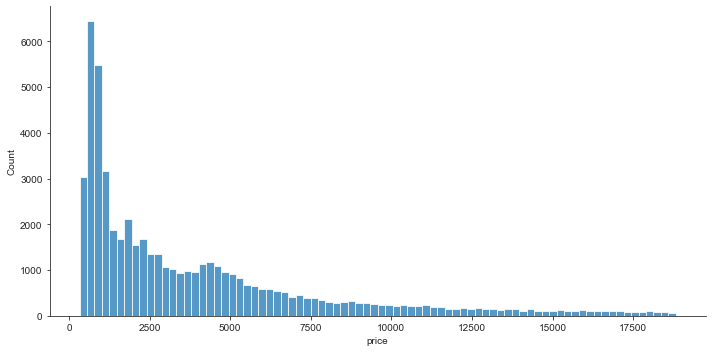

In [24]:
sns.displot(diamonds, x='price', kind='hist', aspect=2)

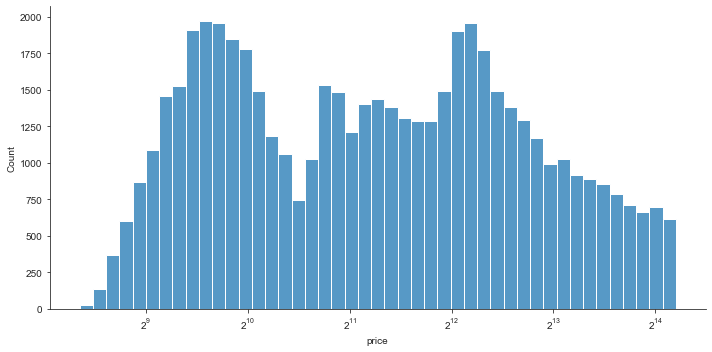

In [25]:
## note also that we can make a transformation to see the distribution in log scale
plot = sns.displot(diamonds, x= 'price', kind = 'hist', log_scale = 2, aspect=2)


### Multivariate Distribution - Study of covariation

#### Categorical Variables vs Categorical Variables


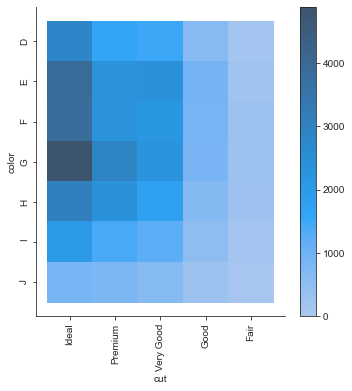

In [27]:
plot = sns.displot(diamonds, x="cut", y="color", cbar = True)
plot.ax.tick_params(labelrotation = 90)

#### Categorical vs Numerical varibles

In order to see the distributions of other categories, we can use `hue` argument

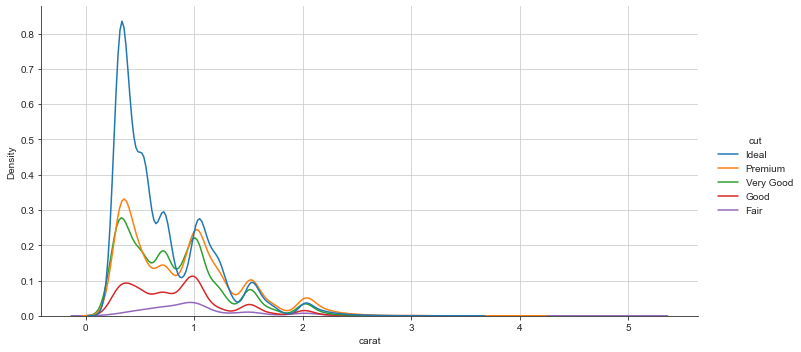

In [33]:
# is this understandable? what do you understand from this graph?
plot= sns.displot(data=diamonds, kind="kde", x="carat", hue = 'cut', aspect=2, alpha=0.5)
plot.ax.grid()

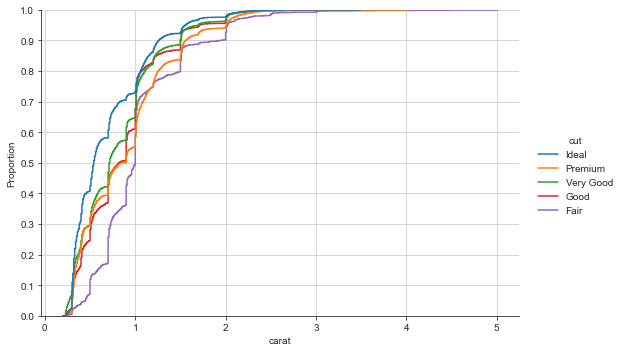

In [34]:
plot= sns.displot(data=diamonds, kind="ecdf", x="carat", hue = 'cut', aspect = 1.5)
plot.ax.set_yticks(ticks = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
plot.ax.grid()

__Boxplots__

https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51

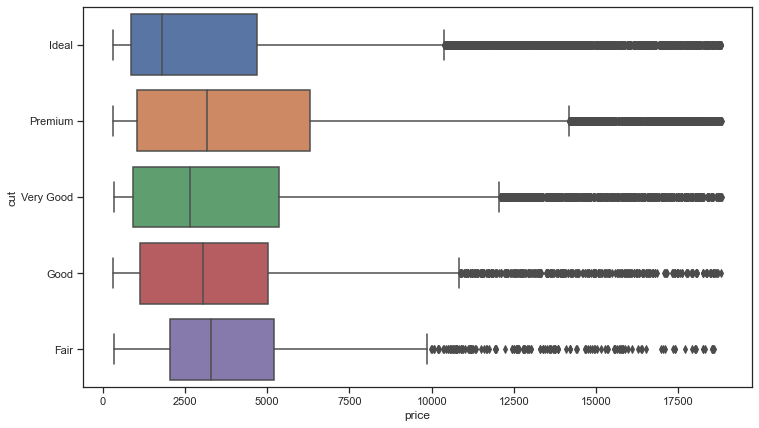

In [35]:
sns.set(rc={"figure.figsize":(12, 7)}) #width=12, #height=7
sns.set_style('ticks')

plot = sns.boxplot(y = 'cut', x = 'price', data = diamonds )


__Violin Plots__

https://towardsdatascience.com/violin-plots-explained-fb1d115e023d

<AxesSubplot:xlabel='cut', ylabel='price'>

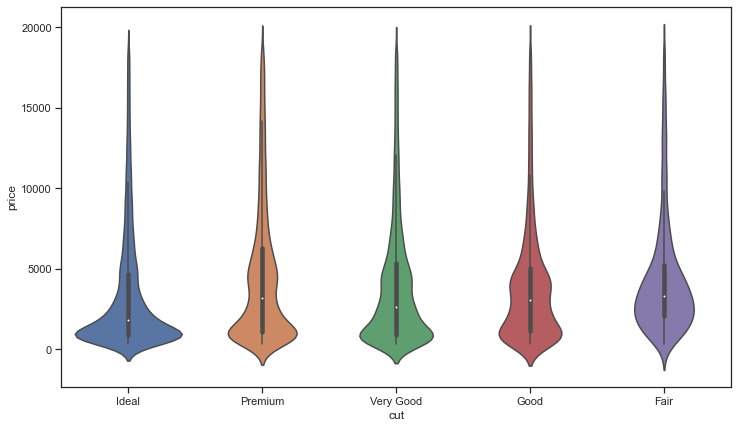

In [36]:
sns.violinplot(data = diamonds, x= 'cut', y = 'price')

#### Continuous to Continuous Variables

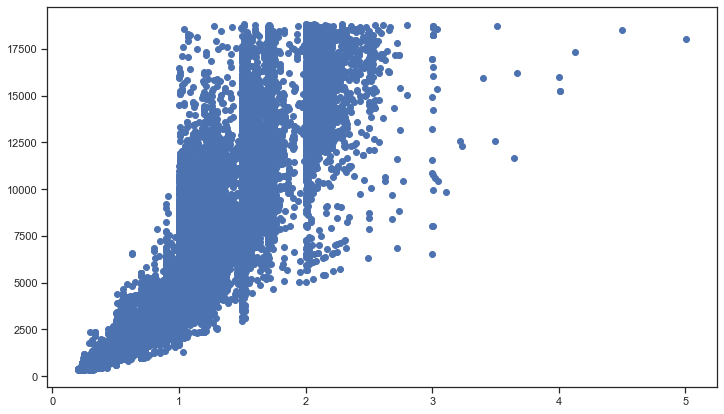

In [42]:
plt.scatter(data = diamonds, x="carat", y="price")
# sns.scatterplot(data = diamonds, x="carat", y="price")

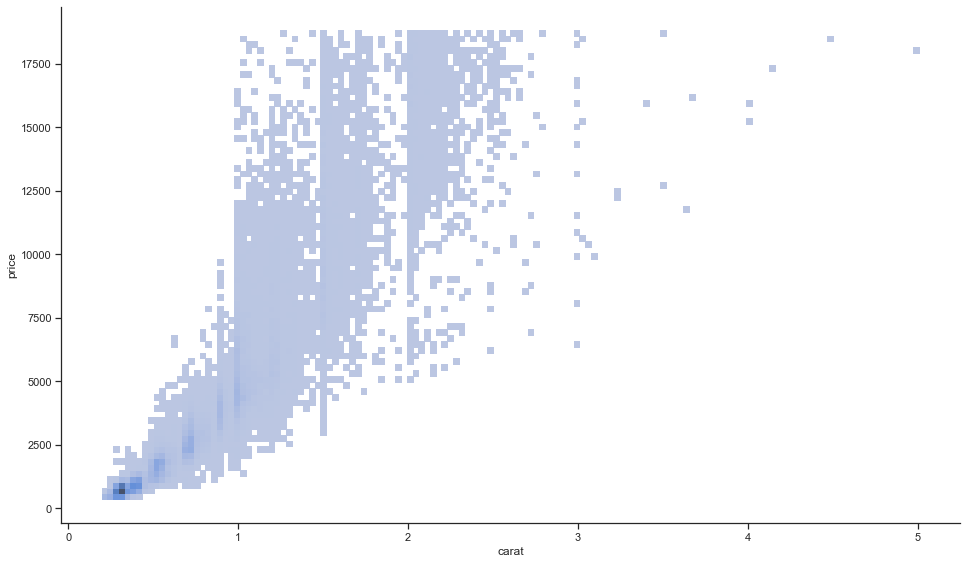

In [43]:

sns.displot(data = diamonds, x="carat", y="price", height= 8, aspect= 1.7)

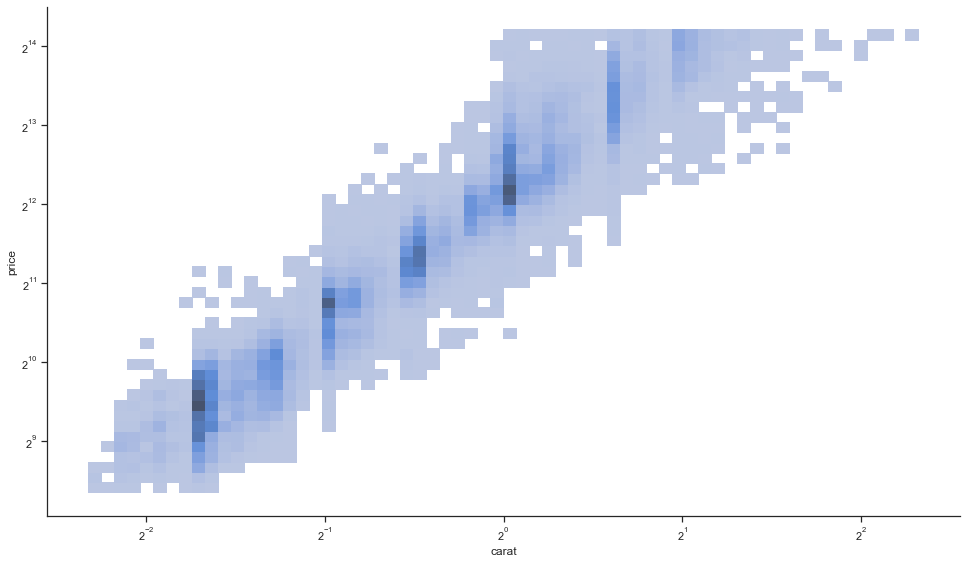

In [44]:
sns.displot(data = diamonds, x="carat", y="price", height= 8, aspect= 1.7, log_scale= 2)

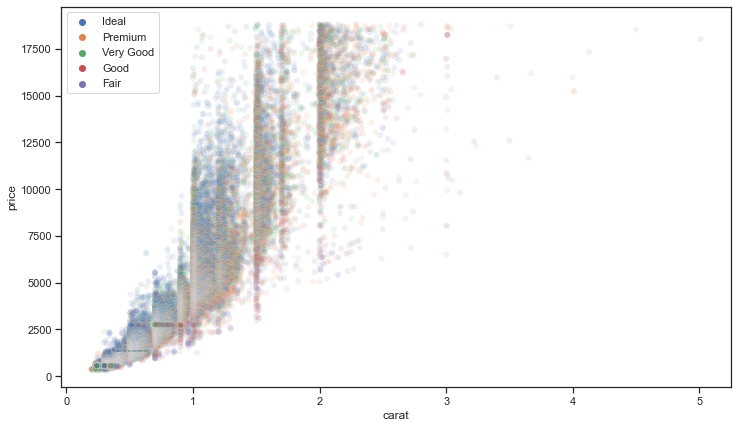

In [45]:
x = diamonds.carat
y = diamonds.price
h = diamonds.cut.values 
plot = sns.scatterplot(x= x, y = y, hue = h, alpha = 0.1 )


- Outliers

  - probably entry errors, 
  - but might give an very interesting insight also

## Some useful methods

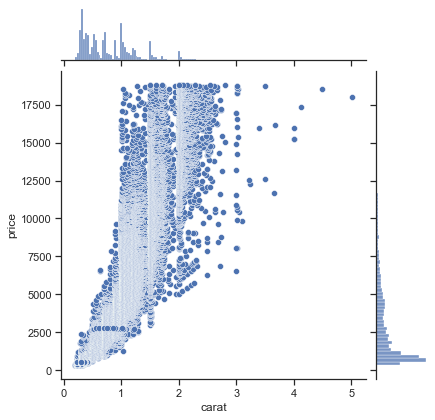

In [49]:
sns.jointplot(data=diamonds, x="carat", y="price") 
# sns.jointplot(data=diamonds, x="carat", y="price", kind='kde')
# sns.jointplot(data=diamonds, x="carat", y="price", kind='hist')



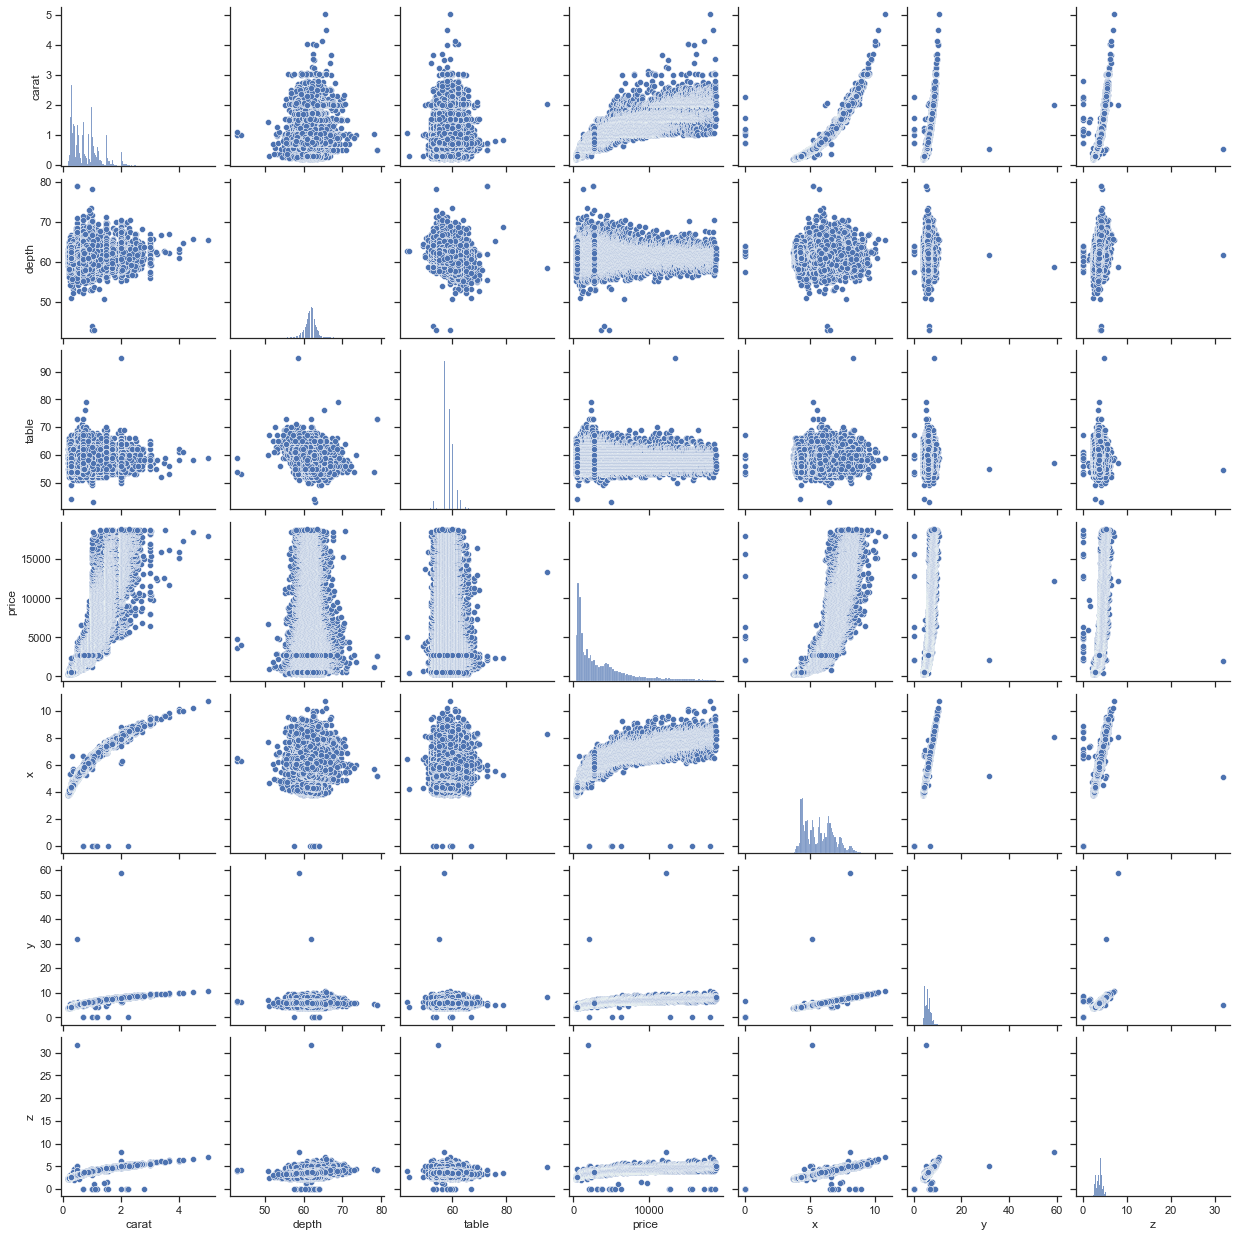

In [50]:
sns.pairplot(diamonds)

## Labs